In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### 1. Fetch Data

In [2]:
data = pd.read_csv('GOOG.csv', parse_dates=['timestamp'])
data.set_index('timestamp', inplace=True)
data.sort_index(inplace=True)
data.head()

,open,high,low,close,volume
timestamp,,,,,
2014-01-02,555.6473,556.7880,552.0607,554.4817,3656400
2014-01-03,555.4182,556.3796,550.4020,550.4368,3345800
2014-01-06,554.4269,557.3409,551.1541,556.5739,3551800
2014-01-07,560.3995,567.7170,558.4866,567.3036,5124300
2014-01-08,570.8603,571.5178,564.5290,568.4842,4501700


### (Data Visualisation)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


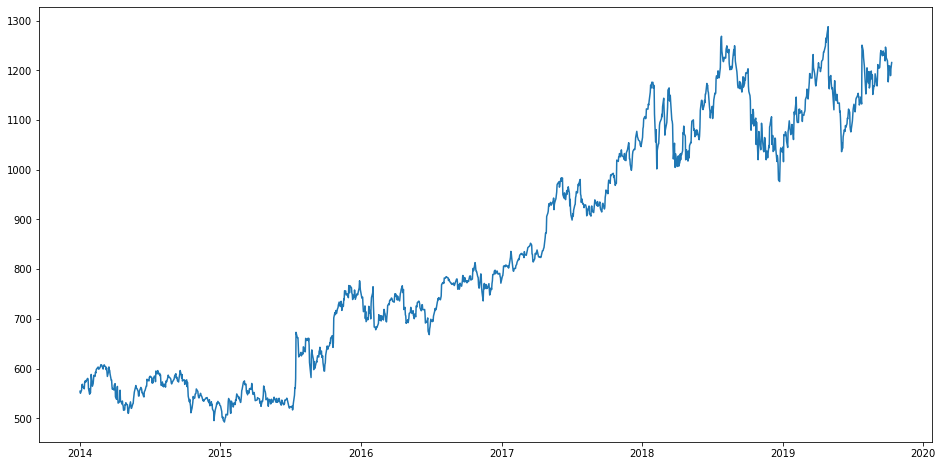

In [3]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['close'])

### 2. Making 2 Dimensional Array for *Close* Values

In [4]:
train = data.iloc[:, 3:4].values 
train

array([[ 554.4817],
       [ 550.4368],
       [ 556.5739],
       ...,
       [1202.3101],
       [1208.67  ],
       [1215.45  ]])

### 3. Scaling the Train Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train)
scaled_data

array([[0.07789857],
       [0.07281084],
       [0.08053017],
       ...,
       [0.89274631],
       [0.90074588],
       [0.90927386]])

### 4. Create x_data and Target Data for Training

In [6]:
x = []
y = []
for i in range(60, len(scaled_data)):
    x.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
x, y = np.array(x), np.array(y)

x

array([[0.07789857, 0.07281084, 0.08053017, ..., 0.08970919, 0.08290253,
        0.08482699],
       [0.07281084, 0.08053017, 0.09402614, ..., 0.08290253, 0.08482699,
        0.08102839],
       [0.08053017, 0.09402614, 0.09551111, ..., 0.08482699, 0.08102839,
        0.09384552],
       ...,
       [0.8314529 , 0.8223589 , 0.82233375, ..., 0.90116096, 0.89950077,
        0.87616819],
       [0.8223589 , 0.82233375, 0.80191942, ..., 0.89950077, 0.87616819,
        0.89274631],
       [0.82233375, 0.80191942, 0.8119442 , ..., 0.87616819, 0.89274631,
        0.90074588]])

### 5. Reshape x_data into 3 Dimensional Shape

In [7]:
x = np.reshape(x, (x.shape[0], x.shape[1],1))
x.shape

(1395, 60, 1)

### 6. Import Keras Library

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

### 7. Create Model and Layers

In [9]:
model = Sequential()

In [11]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [13]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [14]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [15]:
model.add(Dense(units=1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

### 8. Training

In [17]:
model.fit(x, y, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1395/1395 [==============================] - 12s 8ms/step - loss: 0.0406
Epoch 2/100
1395/1395 [==============================] - 9s 7ms/step - loss: 0.0063
Epoch 3/100
1395/1395 [==============================] - 10s 7ms/step - loss: 0.0054
Epoch 4/100
1395/1395 [==============================] - 9s 6ms/step - loss: 0.0056
Epoch 5/100
1395/1395 [==============================] - 9s 6ms/step - loss: 0.0043
Epoch 6/100
1395/1395 [==============================] - 10s 7ms/step - loss: 0.0041
Epoch 7/100
1395/1395 [==============================] - 11s 8ms/step - loss: 0.0044
Epoch 8/100
1395/1395 [==============================] - 10s 7ms/step - loss: 0.0041
Epoch 9/100
1395/1395 [==============================] - 10s 7ms/step - loss: 0.0039
Epoch 10/100
1395/1395 [==============================] - 10s 7ms/step - loss: 0.0042
Epoch 11/100
1395/1395 [==============================] -

### 9. Predict Test Data

In [23]:
pred = model.predict(xts)
pred = scaler.inverse_transform(pred)
pred.shape

(279, 1)

In [24]:
x_data = xts[0]
x_data = x_data.reshape([1, 60, 1])
pred1 = []

for i in range(int(len(xts))):
    pred1.append(model.predict(x_data)[0, 0])
    x_data = np.delete(x_data, 0, 1)
    x_data = np.append(x_data, [[[pred1[i]]]], axis=1)

In [25]:
pred1 = np.array(pred1)
pred1 = np.reshape(pred1, (len(pred1),1),  0)
pred1 = scaler.inverse_transform(pred1)
pred1

array([[1213.33   ],
       [1202.957  ],
       [1192.7601 ],
       [1184.0581 ],
       [1177.1698 ],
       [1171.9891 ],
       [1168.224  ],
       [1165.5002 ],
       [1163.4321 ],
       [1161.6724 ],
       [1159.9463 ],
       [1158.0668 ],
       [1155.9321 ],
       [1153.513  ],
       [1150.8342 ],
       [1147.9532 ],
       [1144.9423 ],
       [1141.8735 ],
       [1138.809  ],
       [1135.7954 ],
       [1132.8624 ],
       [1130.0238 ],
       [1127.2811 ],
       [1124.6265 ],
       [1122.0474 ],
       [1119.5288 ],
       [1117.0573 ],
       [1114.6205 ],
       [1112.2097 ],
       [1109.8192 ],
       [1107.446  ],
       [1105.0894 ],
       [1102.7501 ],
       [1100.4299 ],
       [1098.1307 ],
       [1095.854  ],
       [1093.6013 ],
       [1091.3733 ],
       [1089.1704 ],
       [1086.9923 ],
       [1084.8384 ],
       [1082.7076 ],
       [1080.5994 ],
       [1078.5123 ],
       [1076.4458 ],
       [1074.3988 ],
       [1072.3705 ],
       [1070.

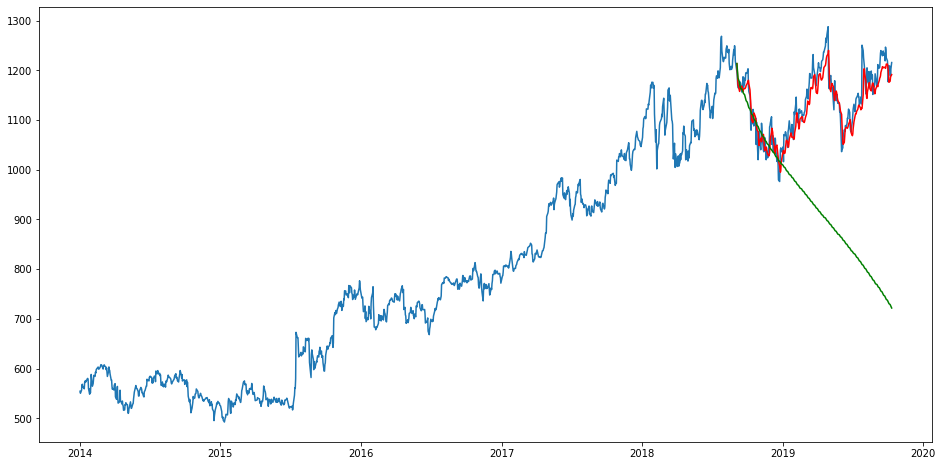

In [27]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['close'])
plt.plot(data.tail(279).index, pred, 'r-')
plt.plot(data.tail(279).index, pred1, 'g-')